**INTRODUCTION**

What is the context of the work? What research question are you trying to answer? What are your main findings?

**DATA DESCRIPTION**
 
  The dataset that we created to analyze crime in the city of Chicago relative to weather spans over 8 columns and 1,461 rows. The columns represented are Date, Temperature, Precipitation, Snow, Wind, Crimes, Arrests and Arrest Rate. Each row is a date with the information on that given day from each column, there are 1,461 rows for each day in the past four years (2019, 2018, 2017, 2016). The original 7 datasets were public csv files that were funded by the government, allowing us to have easy access to them. 
 
   When processing all of the data, we had to be smart with it. Simply tallying the crime data wasn’t going to give us enough specifics as those datasets only had each individual crime with their date. First we ran a function to re-format the date so that it matched that of the weather data, then got the values of crime and arrests by taking all of the given crimes in a day to get that value and each crime had a boolean as to if there was an arrest or not – so if arrest was true, we tallied our arrest variable. Then for a given day the arrest rate was created by simply dividing the number of arrests by the number of crimes. For the weather it was all about consistency. Each of the datasets had hundreds of thousands of points from of different weather data collected from different locations. To be consistent, we isolated the location of the collection to the O’Hare International Airport for it recorded every day and had all of the values we wanted to use recorded.
   
  With all of the data gathered we then concatenated all of the information that we wanted into one DataFrame object with each date having its own row as it was the most effective way for us to grab the information to later analyze.
  
Link for raw datasets go here



**DATA ANALYSIS**

Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data.
Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
def color_picker(y):
    if y == 'TEMP':
        return 'c'
    if y == 'PRCP':
        return 'm'
    if y == 'SNOW':
        return 'g'
    else:
        return 'r'

In [3]:
crime_weather = pd.read_csv('crime_weather.csv')

Mean Temperature: 51.5092
Temperature Standard Deviation: 20.0099



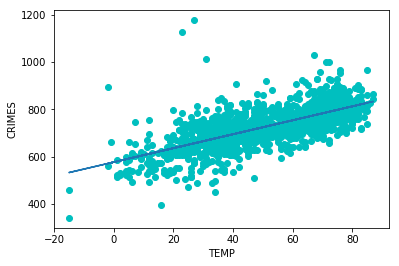

Slope of Line of Best Fit: 2.9500
R^2 Value: 0.4889


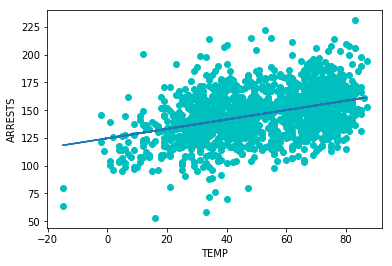

Slope of Line of Best Fit: 0.4234
R^2 Value: 0.1436


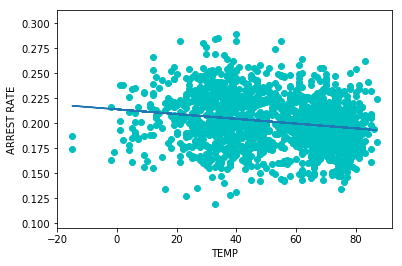

Slope of Line of Best Fit: -0.0002
R^2 Value: 0.0335


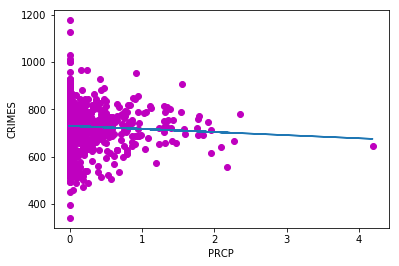

Slope of Line of Best Fit: -13.1636
R^2 Value: 0.0024


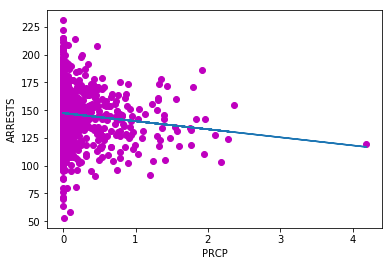

Slope of Line of Best Fit: -7.2768
R^2 Value: 0.0106


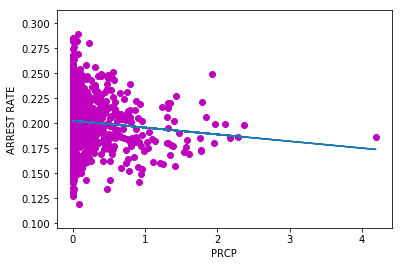

Slope of Line of Best Fit: -0.0068
R^2 Value: 0.0070


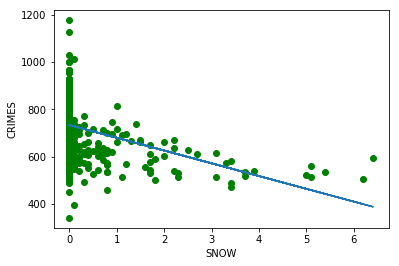

Slope of Line of Best Fit: -54.0201
R^2 Value: 0.1070


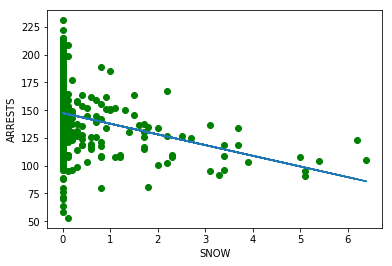

Slope of Line of Best Fit: -9.6124
R^2 Value: 0.0483


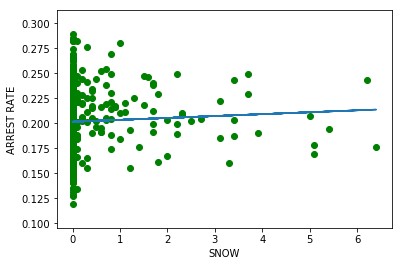

Slope of Line of Best Fit: 0.0019
R^2 Value: 0.0014


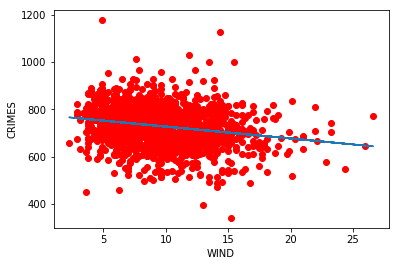

Slope of Line of Best Fit: -5.0316
R^2 Value: 0.0459


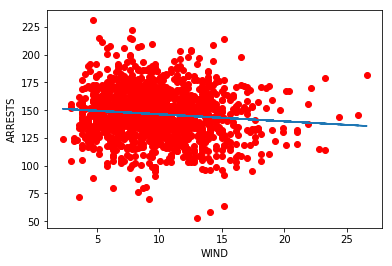

Slope of Line of Best Fit: -0.6325
R^2 Value: 0.0104


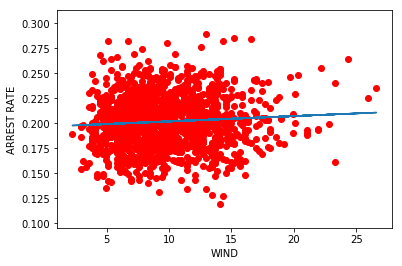

Slope of Line of Best Fit: 0.0005
R^2 Value: 0.0054


In [46]:
mean_temp = crime_weather["TEMP"].mean()
std_temp = crime_weather["TEMP"].std()
print("Mean Temperature: {:.4f}".format(mean_temp))
print("Temperature Standard Deviation: {:.4f}".format(std_temp))
print()

X = ['TEMP', 'PRCP', 'SNOW', 'WIND', ]
Y = ['CRIMES', 'ARRESTS', 'ARREST RATE']

for x in X:
    for y in Y:
        plt.scatter(crime_weather[x], crime_weather[y], color=color_picker(x))
        plt.xlabel(x)
        plt.ylabel(y)
        cw_reg = LinearRegression().fit(crime_weather[[x]], crime_weather[y])
        reg_pred_y = cw_reg.predict(crime_weather[[x]])
        plt.plot(crime_weather[x], reg_pred_y)
        plt.show()
        print("Slope of Line of Best Fit: {:.4f}".format(cw_reg.coef_[0]))
        print("R^2 Value: {:.4f}".format(cw_reg.score(crime_weather[[x]], crime_weather[y])))

------------------------------------------------------------------------------------------------------------------------

**Evaluation of significance.** Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

-------------------------------------------------------------------------------------------------------------------------

Out of all of the regressions we ran, the strongest correlation was between Temperature and Crime, with the second strongest being between Temperature and Arrests. Next we will run random permutations on the Crime and Arrest data to see if the correlation was random or is real.

In [16]:
def permuted_y(y):
    return np.random.permutation(crime_weather[y].copy())

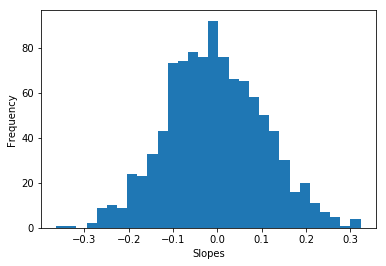

In [42]:
permuted_slopes = np.zeros(1000)
for i in range(1000):
    fake_crime = permuted_y("CRIMES")
    perm_cw_model = LinearRegression().fit(crime_weather[['TEMP']], fake_crime)
    permuted_slopes[i] = perm_cw_model.coef_[0]

plt.hist(permuted_slopes, bins=30)
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.show()

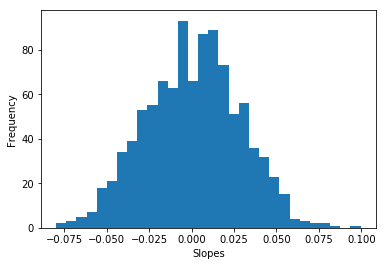

In [43]:
permuted_slopes = np.zeros(1000)
for i in range(1000):
    fake_crime = permuted_y("ARRESTS")
    perm_cw_model = LinearRegression().fit(crime_weather[['TEMP']], fake_crime)
    permuted_slopes[i] = perm_cw_model.coef_[0]

plt.hist(permuted_slopes, bins=30)
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.show()

The slope of the line of best fit between the real values of Temperature and Crime is 2.95, and the slope of the line of best fit between the real values of Temperature and Arrest is 0.4234. After randomizing the Y values matched with the X values, we can see that these slopes reveal true correlations. The largest slope between Temperature and the randomized Crime values was a little over 0.3. And the largest slope between Temperature and the randomized Arrest values was just under 0.1. The fact that we don't see any slopes as large as the real slopes after running through 1000 of the permuted Y values shows that the true slopes are most likely not produced from randomness. Nevertheless, it can still be seen that the Temperature to Crime relationship is still significantly stronger than the Temperature to Arrests ratio.

------------------------------------------------------------------------------------------------------------------------

**Conclusion.** What did you find over the course of your data analysis, and how confident are you in these conclusions? Interpret these results in the wider context of the real-life application from where your data hails.
